## Klasifikasi Otomatis Sampah Berbasis Deep Learning Menggunakan EfficientNetB3 untuk Mendukung Pengelolaan Limbah Berkelanjutan

## Automated Waste Classification Using EfficientNetB3-Based Deep Learning for Supporting Sustainable Waste Management

Judul ini sesuai dengan:
- Topik klasifikasi 6 jenis sampah (battery, glass, metal, organic, paper, plastic),
- Penerapan model deep learning mutakhir (EfficientNetB3),
- Relevansi terhadap SDG 12 (Konsumsi dan Produksi yang Bertanggung Jawab) dan SDG 13 (Penanganan Perubahan Iklim).

In [1]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image
import pandas as pd


In [2]:
BATCH_SIZE = 64
n_classes = 6
IMG_SIZE = (224, 224)
DATA_PATH = 'garbage_data'

# Augmentasi & Preprocessing EfficientNet
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1  # 90% train, 10% val
)

train_data = datagen.flow_from_directory(
    DATA_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    DATA_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 4188 images belonging to 6 classes.
Found 462 images belonging to 6 classes.


In [3]:
base_model = EfficientNetB3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # freeze awal

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(n_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


43941136/43941136 [==============================] - 191s 4us/step


In [4]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [5]:
checkpoint = ModelCheckpoint('best_model_efficientnet.keras', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)


In [6]:
history = model.fit(
    train_data,
    epochs=200,
    validation_data=val_data,
    callbacks=[checkpoint, early_stop, reduce_lr]
)


Epoch 1/200
66/66 [==============================] - ETA: 0s - loss: 1.2325 - accuracy: 0.6144
Epoch 1: val_loss improved from inf to 0.78858, saving model to best_model_efficientnet.keras
66/66 [==============================] - 501s 7s/step - loss: 1.2325 - accuracy: 0.6144 - val_loss: 0.7886 - val_accuracy: 0.7900 - lr: 1.0000e-04
Epoch 2/200
66/66 [==============================] - ETA: 0s - loss: 0.5101 - accuracy: 0.8617
Epoch 2: val_loss improved from 0.78858 to 0.49528, saving model to best_model_efficientnet.keras
66/66 [==============================] - 471s 7s/step - loss: 0.5101 - accuracy: 0.8617 - val_loss: 0.4953 - val_accuracy: 0.8247 - lr: 1.0000e-04
Epoch 3/200
66/66 [==============================] - ETA: 0s - loss: 0.3474 - accuracy: 0.8937
Epoch 3: val_loss improved from 0.49528 to 0.39302, saving model to best_model_efficientnet.keras
66/66 [==============================] - 458s 7s/step - loss: 0.3474 - accuracy: 0.8937 - val_loss: 0.3930 - val_accuracy: 0.8463 -

Epoch 27/200
66/66 [==============================] - ETA: 0s - loss: 0.0539 - accuracy: 0.9819
Epoch 27: val_loss did not improve from 0.19821
66/66 [==============================] - 610s 9s/step - loss: 0.0539 - accuracy: 0.9819 - val_loss: 0.2345 - val_accuracy: 0.9199 - lr: 1.0000e-04
Epoch 28/200
66/66 [==============================] - ETA: 0s - loss: 0.0507 - accuracy: 0.9838
Epoch 28: val_loss did not improve from 0.19821
66/66 [==============================] - 624s 9s/step - loss: 0.0507 - accuracy: 0.9838 - val_loss: 0.2761 - val_accuracy: 0.9134 - lr: 1.0000e-04
Epoch 29/200
66/66 [==============================] - ETA: 0s - loss: 0.0389 - accuracy: 0.9890
Epoch 29: val_loss did not improve from 0.19821
66/66 [==============================] - 609s 9s/step - loss: 0.0389 - accuracy: 0.9890 - val_loss: 0.2164 - val_accuracy: 0.9264 - lr: 2.0000e-05
Epoch 30/200
66/66 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.9890
Epoch 30: val_loss did not impr

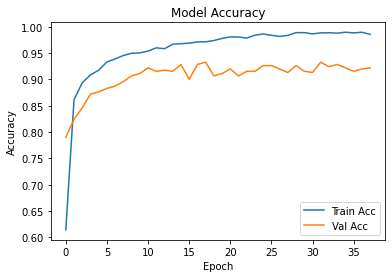

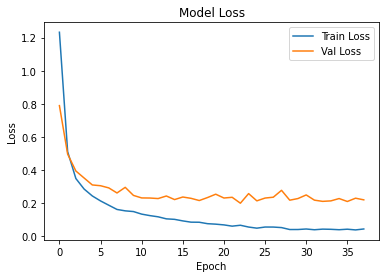

In [7]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


8/8 [==============================] - 52s 6s/step


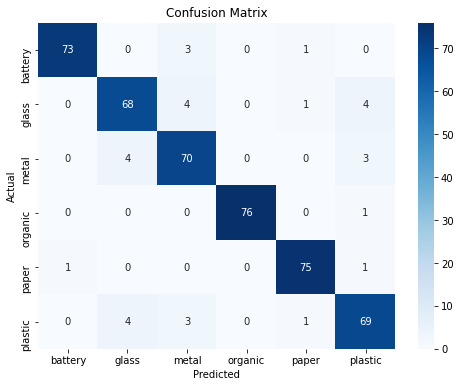

Classification Report:
               precision    recall  f1-score   support

     battery       0.99      0.95      0.97        77
       glass       0.89      0.88      0.89        77
       metal       0.88      0.91      0.89        77
     organic       1.00      0.99      0.99        77
       paper       0.96      0.97      0.97        77
     plastic       0.88      0.90      0.89        77

    accuracy                           0.93       462
   macro avg       0.93      0.93      0.93       462
weighted avg       0.93      0.93      0.93       462



In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prediksi data validasi
val_data.reset()  # penting agar urutan batch sama
preds = model.predict(val_data, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = val_data.classes

# Label class
class_labels = list(val_data.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Akurasi dan laporan klasifikasi
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", report)


In [26]:
from tensorflow.keras.utils import load_img, img_to_array
output_class = list(val_data.class_indices.keys())

def preprocessing_input_user(img_path):
    img = load_img(img_path, target_size=IMG_SIZE)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
#     img = img / 255.0  # Normalisasi jika diperlukan
    return img

def predict_user(img_path):
    img = preprocessing_input_user(img_path)
    original = Image.open(img_path)

    plt.subplot(1, 1, 1)
    plt.imshow(original)
    plt.axis('off')
    plt.title("Original Image")
    plt.show()

    pred_array = model.predict(img)
    pred_class = output_class[np.argmax(pred_array)]
    confidence = round(np.max(pred_array) * 100, 2)
    print(f"Your waste material is: {pred_class} with {confidence}% confidence.")


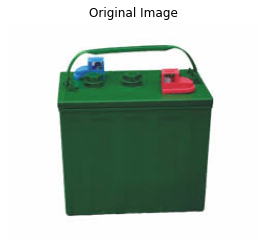

1/1 [==============================] - 0s 156ms/step
Your waste material is: battery with 98.35% confidence.


In [19]:
predict_user('garbage_data/battery/battery4.jpg')


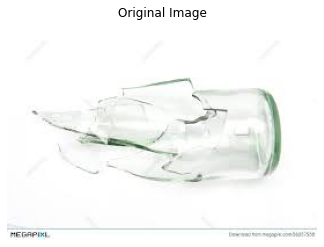

1/1 [==============================] - 0s 250ms/step
Your waste material is: glass with 99.93% confidence.


In [29]:
predict_user('garbage_data/glass/glass2.jpg')

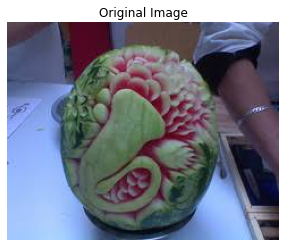

1/1 [==============================] - 0s 247ms/step
Your waste material is: organic with 99.46% confidence.


In [31]:
predict_user('garbage_data/organic/biological52.jpg')

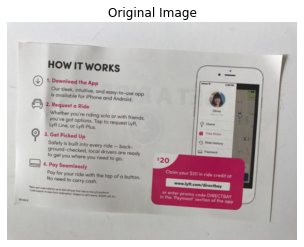

1/1 [==============================] - 0s 212ms/step
Your waste material is: paper with 99.78% confidence.


In [32]:
predict_user('garbage_data/paper/paper12.jpg')

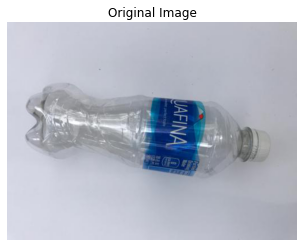

1/1 [==============================] - 0s 192ms/step
Your waste material is: plastic with 99.84% confidence.


In [33]:
predict_user('garbage_data/plastic/plastic49.jpg')

In [34]:
from keras.models import load_model
model = load_model('best_model_efficientnet.keras')

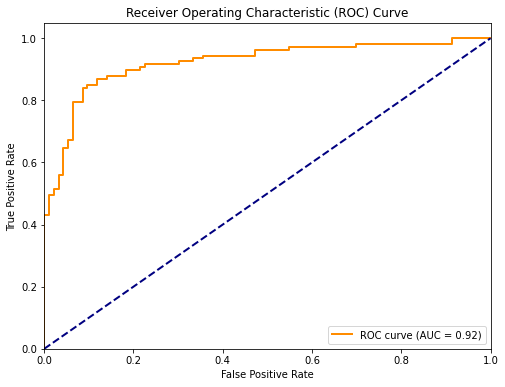

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize

# Contoh data dummy (bisa diganti dengan data kamu)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
y_bin = label_binarize(y, classes=[0, 1])  # Binarize target label jika multi-class

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Model (gunakan model sesuai kebutuhan, misal LogisticRegression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi probabilitas untuk kelas positif
y_score = model.predict_proba(X_test)[:, 1]  # Ambil probabilitas untuk kelas positif (misal kelas 1)

# Hitung ROC curve
fpr, tpr, thresholds = roc_curve(y_test[:, 0], y_score)  # y_test[:, 0] karena y_test adalah binary

# Hitung AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
